# Machine Learning (W/ Sklearn)
- polyfit
- nlinfit
- sklearn
    - preprocess data with sklearn helpers
    - regression w sklearn: linear fit, lasso, gpr, svm
    - classification w sklearn: random forests
- keras via tensorflow
    - neural networks in general
    - feed forward NN for simple regression
    - feed forward NN for simple classification
    - CNN for classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Curve Fitting via Polyfit
A lot of times machine learning is just a fancy term for fitting a model. So let's start with a very simple model: polynomials.

In [3]:
x = np.linspace(-3, 3, 50)
y = x**2 +  np.random.rand(*x.shape)

In [4]:
p= np.polyfit(x, y, deg=2)
p

array([1.00346889, 0.01741276, 0.49128129])

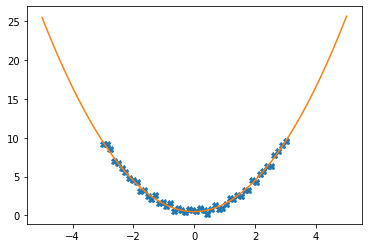

In [5]:
t = np.linspace(-5, 5, 100)

plt.plot(x, y, "X", label="data")
plt.plot(t, np.polyval(p, t), label="deg2 poly fit")

### Compare with higher orders
The tricky question when fitting polynomials is often which degree to use. Very often this comes down to using prior knowledge and [occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor): the simplest model (i.e. the lowest degree polynomial) that fits the data well is probably a good choice. 

Below I have added a 8th-degree polynomial fit to the picture. It porbably fits the data within quite well, but outside the data, it does terrible - which is not very surprising.

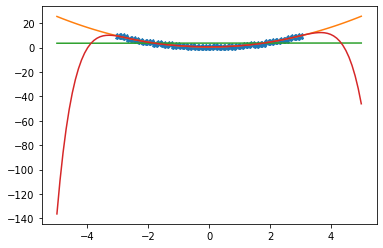

In [6]:
t = np.linspace(-5, 5, 100)

plt.plot(x, y, "X", label="data")
plt.plot(t, np.polyval(p, t), label="deg2 poly fit")

# add some other fits for comparison
plt.plot(t, np.polyval(np.polyfit(x, y, deg=1), t), label="deg1 poly fit")
plt.plot(t, np.polyval(np.polyfit(x, y, deg=8), t), label="deg1 poly fit")

# Exponental fit
Quite often it makes sense to "transform" the data in a way that allows us to apply a simpler model. E.g. to fit an exponential we can simply take the log of our input data and apply a polynomial fit to the result. 

Text(0, 0.5, 'y')

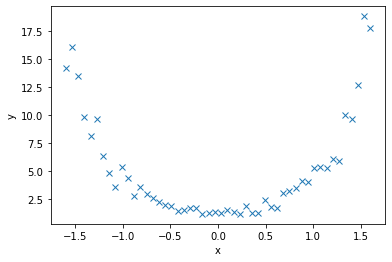

In [82]:
x = np.linspace(-1.6, 1.6, 50)
y = np.exp(x**2) * (1 + np.random.rand(*x.shape))

plt.plot(x, y, "x")
plt.xlabel("x")
plt.ylabel("y")

In [83]:
p = np.polyfit(x, np.log(y), deg=2)
p

array([1.02816891, 0.01813332, 0.34511819])

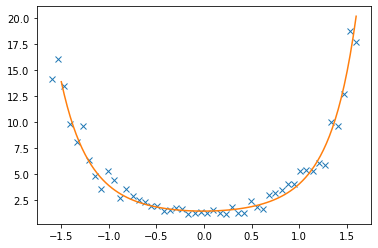

In [84]:
t = np.linspace(-1.5, 1.6, 100)

plt.plot(x, y, "x")
plt.plot(t, np.exp(np.polyval(p, t)), "-", label="exp(x**2)")


## Let's compare the performance of this model to a parabolic fit

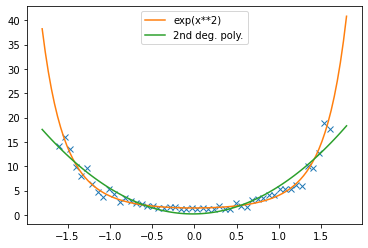

In [85]:
t = np.linspace(-1.8, 1.8, 100)

plt.plot(x, y, "x")
plt.plot(t, np.exp(np.polyval(p, t)), "-", label="exp(x**2)")
plt.plot(t, np.polyval(np.polyfit(x, y, deg=2), t), "-", label="2nd deg. poly.")

plt.legend()


Its not too easy to see which of the two performs better, is it? 


## Scatter plot
An interesting tool to look at the performance of a model is to do a scatter plot, where the model prediciton is plotted against the acatual data value. A perfect fit would yield values lying on a straight line. 



In [86]:
y_prediction_exp = np.exp(np.polyval(p, x))
y_prediction_poly = np.polyval(np.polyfit(x, y, deg=2), x)

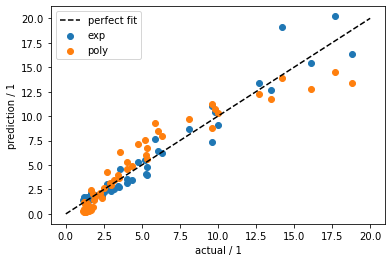

In [87]:
plt.scatter(y, y_prediction_exp, label="exp")
plt.scatter(y, y_prediction_poly, label="poly")

plt.plot([0.0, 20], [0, 20], "k--", label="perfect fit")

plt.ylabel("prediction / 1")
plt.xlabel("actual / 1")

plt.legend()

The exp fit's points lie much closer and also much more symmetric around the "perfect fit"-line, which may be a hint that the fit is superiour. 

## Error measures
The best input is probably going to come from some numbers. So let's calculate a few different errors for the models  and compare them.

### Mean absolute error

In [93]:
mae_exp = np.mean(np.abs(y - y_prediction_exp))
mae_poly = np.mean(np.abs(y - y_prediction_poly))

print(f"MAE for exp: {mae_exp:1.2f}")
print(f"MAE for poly: {mae_poly:1.2f}")

MAE for exp: 0.71
MAE for poly: 1.13


### Root mean square error

In [95]:
rmse_exp = np.sqrt(np.mean((y - y_prediction_exp)**2))
rmse_poly = np.sqrt(np.mean((y - y_prediction_poly)**2))

print(f"RMSE for exp: {rmse_exp:1.2f}")
print(f"RMSE for poly: {rmse_poly:1.2f}")

RMSE for exp: 1.10
RMSE for poly: 1.55


### Cross-validation
When fitting models [corrs-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is an important topic. There are greate helper functions for this and more useful error measures available in [scikit-learn](https://scikit-learn.org/stable/).

### Exercise
Look at the corona data for Austria in chapter 5. Take the data of the increasing flank of the second wave (e.g. from mid-August to mid-November, use everything until the peak) and fit an exponential curve to this data. Use the model to calculate when 100k cases would have been reached. 

For your convenience, the data concerning austria is saved to "data/ecdc_corona_austria.csv". Just open it using pandas a DataFrame.

# Nlinfit- Scipy Optimize
https://docs.scipy.org/doc/scipy/reference/optimize.html

# Sklearn - Regression

https://scikit-learn.org/stable/